<a href="https://colab.research.google.com/github/fduque/prophet_forecasting_temperature_times_series/blob/master/101_project_Forecasting_times_series_with_Prophet_package_(Facebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Objetivo do projeto**: 
Realizar a previsão de uma série de dados temporais através da biblioteca -Prophet- desenvolvida e utilizada pelo Facebook.

O exemplo abaixo é baseado no case apresentado pelo Cientista de Dados Mário Filho e pode ser conferido em:

Canal Mário Filho - https://www.youtube.com/watch?v=4kWROiUYHBc


A série é baseada em dados oriundos de estações meteorológicas. A série de dados provém do Kaggle no endereço:

https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region



Prophet - O PROFETA

Highlights sobre o Prophet:

*   Objetivo primário do Prophet: Fazer previsões de séries temporais.
*   O Prophet é um procedimento para prever dados de séries temporais com base em um modelo aditivo no qual tendências não lineares se ajustam à sazonalidade anual, semanal e diária, além de efeitos de férias.
*   O Prophet foi desenvolvido pelo Facebook
*   O Prophet funciona melhor com séries temporais que têm fortes efeitos sazonais e várias temporadas de dados históricos.
*   O Prophet é robusto para a falta de dados e mudanças na tendência, e geralmente lida bem com outliers.
*   O Prophet aceita times series que não são igualmente espaçadas



Referências:

Página oficial - https://facebook.github.io/prophet/

Canal Mário Filho - https://www.youtube.com/watch?v=4kWROiUYHBc

Dataset de Dados climáticos - https://www.kaggle.com/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region











In [0]:
import pandas as pd

In [0]:
#loading dataset
#using parse_dates to converting string to date type
data = pd.read_csv("sudeste.csv", parse_dates=['mdct','date'])

In [0]:
#sorting dataset by mdct (mdct has hourly time)
data.sort_values("mdct", inplace=True)

In [0]:
pd.set_option("display.max_columns", 31)
data.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
782520,312,BARBACENA,1169.0,-21.228373,-43.767703,A502,Barbacena,MG,2002-12-05 00:00:00,2002-12-05,2002.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782521,312,BARBACENA,1169.0,-21.228373,-43.767703,A502,Barbacena,MG,2002-12-05 01:00:00,2002-12-05,2002.0,12.0,5.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782522,312,BARBACENA,1169.0,-21.228373,-43.767703,A502,Barbacena,MG,2002-12-05 02:00:00,2002-12-05,2002.0,12.0,5.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782523,312,BARBACENA,1169.0,-21.228373,-43.767703,A502,Barbacena,MG,2002-12-05 03:00:00,2002-12-05,2002.0,12.0,5.0,3.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782524,312,BARBACENA,1169.0,-21.228373,-43.767703,A502,Barbacena,MG,2002-12-05 04:00:00,2002-12-05,2002.0,12.0,5.0,4.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#checking how many weather stations per location
data['wsnm'].value_counts().head(30)

BARBACENA         121176
ALMENARA          120936
UBERLÂNDIA        120864
ARAXÁ             120840
MONTES CLAROS     120840
MONTE VERDE       103296
VIÇOSA             96816
TIMÓTEO            92976
ITUIUTABA          91080
S.J.DEL REI        90408
VARGINHA           89592
PASSOS             89472
OURO BRANCO        89232
MURIAÉ             88440
SÃO MATEUS         87096
ALEGRE             87096
LINHARES           87048
VITÓRIA            86952
ALFREDO CHAVES     86880
JUÍZ DE FORA       81984
SANTA TERESA       80184
SÃO GONÇALO        78048
PRES. KENNEDY      72648
NOVA VENECIA       72552
AFONSO CLAUDIO     44016
CAMPINA VERDE      31172
Name: wsnm, dtype: int64

In [0]:
#creating dataframes according location
data_linhares = data[data['wsnm'] == 'LINHARES']

# **Challenge**: 
Find out a model to forecast the temperature on Christmas Day in LINHARES, a city from Espirito Santo State.


---



In [0]:
data_linhares.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,yr,mo,da,hr,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
245184,305,LINHARES,38.0,-19.356923,-40.06868,A614,Linhares,ES,2006-10-27 00:00:00,2006-10-27,2006.0,10.0,27.0,0.0,NaN,1009.0,1009.0,1008.5,NaN,20.5,19.9,20.9,20.0,20.5,19.7,96.0,96.0,94.0,0.2,325.0,1.8
245185,305,LINHARES,38.0,-19.356923,-40.06868,A614,Linhares,ES,2006-10-27 01:00:00,2006-10-27,2006.0,10.0,27.0,1.0,NaN,1008.9,1009.1,1008.8,NaN,20.3,19.9,20.6,20.0,20.1,19.8,98.0,98.0,96.0,0.4,272.0,1.3
245186,305,LINHARES,38.0,-19.356923,-40.06868,A614,Linhares,ES,2006-10-27 02:00:00,2006-10-27,2006.0,10.0,27.0,2.0,NaN,1008.7,1009.1,1008.7,NaN,20.3,19.9,20.6,20.3,20.2,19.8,98.0,98.0,98.0,1.2,276.0,3.2
245187,305,LINHARES,38.0,-19.356923,-40.06868,A614,Linhares,ES,2006-10-27 03:00:00,2006-10-27,2006.0,10.0,27.0,3.0,NaN,1008.1,1008.7,1008.1,NaN,20.0,19.7,20.3,20.0,20.0,19.7,98.0,98.0,98.0,0.8,280.0,3.2
245188,305,LINHARES,38.0,-19.356923,-40.06868,A614,Linhares,ES,2006-10-27 04:00:00,2006-10-27,2006.0,10.0,27.0,4.0,NaN,1006.9,1008.1,1006.9,NaN,19.5,19.2,20.0,19.7,19.5,19.1,98.0,98.0,97.0,0.2,287.0,3.1


In [0]:
#creating new column to store ZERO in tmax
data_linhares['zero'] = data_linhares['tmax'] == 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
#summarizing qty of ZERO per year. 
dates_zero_qty = data_linhares.groupby(data_linhares['date'].dt.year)['zero'].sum()
dates_zero_qty

date
2006      46.0
2007      16.0
2008      92.0
2009      34.0
2010     604.0
2011      65.0
2012       7.0
2013    1186.0
2014       6.0
2015    1269.0
2016       0.0
Name: zero, dtype: float64

In [0]:
#summarizing qty of dates per year 
#Reason: check if its meaningful 
dates_total_qty = data_linhares.groupby(data_linhares['date'].dt.year)['date'].count()
dates_total_qty

date
2006    1584
2007    8760
2008    8784
2009    8760
2010    8760
2011    8760
2012    8784
2013    8760
2014    8760
2015    8760
2016    6576
Name: date, dtype: int64

In [0]:
#checking if qty of ZERO against total of points
#Reason: check if its meaningful 
round(dates_zero_qty / dates_total_qty *100,2)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


date
2006     2.90
2007     0.18
2008     1.05
2009     0.39
2010     6.89
2011     0.74
2012     0.08
2013    13.54
2014     0.07
2015    14.49
2016     0.00
dtype: float64

Result = Qty of ZEROs is too low

In [0]:
#creating a dataframe that will store Date and Temperature
#Prophet just request these only two columns to forecast.
tmax = data_linhares[['mdct','tmax']]
#Prophet request 'ds' and 'y' as columns names of your dataset
tmax.columns = ['ds','y']

In [0]:
tmax.tail()

,ds,y
332227,2016-09-30 19:00:00,27.5
332228,2016-09-30 20:00:00,25.5
332229,2016-09-30 21:00:00,23.9
332230,2016-09-30 22:00:00,23.2
332231,2016-09-30 23:00:00,22.9


# **Model 1: Using day before**

In [0]:
# assumption: test is the following day
train = tmax[tmax['ds'].dt.date == pd.to_datetime('2007-12-24')]
test = tmax[tmax['ds'].dt.date == pd.to_datetime('2007-12-25')]

In [0]:
train.shape, test.shape

((24, 2), (24, 2))

In [0]:
# MAPE = mean absolute percentage error
import numpy as np 

def mape(ytrue, ypred):
  ytrue = ytrue.values
  ypred = ypred.values
  return np.mean( np.abs((ytrue - ypred) / ytrue))

In [0]:
#defining baseline before processing model
mapeBaseline = mape(test['y'], train['y'])
print("Baseline to be beaten:", mapeBaseline)

Baseline to be beaten: 0.020237714063247793


In [0]:
#defining a function to check if the model has beaten or not the baseline
def checkResult(mapeModel, mapeBaseline):
  if mapeModel < mapeBaseline:
    print("Success! The model got better results than baseline. Model:", mapeModel, "Baseline:", mapeBaseline)
  else:
    print("Sorry! Baseline is still better than your model. Try something different. Model:", mapeModel, "Baseline:", mapeBaseline)

In [0]:
from fbprophet import Prophet
#importando o Prophet
# passando o dataset para treinamento do modelo
prophet = Prophet()
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 18.


In [0]:
train.tail()

,ds,y
255355,2007-12-24 19:00:00,29.0
255356,2007-12-24 20:00:00,28.4
255357,2007-12-24 21:00:00,27.2
255358,2007-12-24 22:00:00,26.0
255359,2007-12-24 23:00:00,24.8


In [0]:
#make_future_dataframe is a function from Prophet that does the forecast
?prophet.make_future_dataframe

In [0]:
#passing parameters for function forecast
#par1 = number of periods to be forecast. On this example, 24 hours
#par2 = True or False if we want to consider history for make predictions, On this example = False
#par3 = frequency of period that we're working on. On this example, Hourly frequency. But would by, D=daily, M=Monthly...

future = prophet.make_future_dataframe(24, include_history=False, freq='H')

In [0]:
#future is the dataset created to be used as reference to forecast
future.tail()

,ds
19,2007-12-25 19:00:00
20,2007-12-25 20:00:00
21,2007-12-25 21:00:00
22,2007-12-25 22:00:00
23,2007-12-25 23:00:00


In [0]:
#finally, passing FUTURE for the function predict. 
#FUTURE has the calendar/time series that we want to predict
model1_1d = prophet.predict(future)

In [0]:
#Result of model 1: Predicting based on the day before
model1_1d.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19,2007-12-25 19:00:00,35.032316,32.252084,37.547069,35.028070,35.036837,0.0,0.0,0.0,0.0,0.0,0.0,35.032316
20,2007-12-25 20:00:00,35.326871,32.566662,38.112334,35.322331,35.331776,0.0,0.0,0.0,0.0,0.0,0.0,35.326871
21,2007-12-25 21:00:00,35.621427,32.801353,38.164462,35.616472,35.626671,0.0,0.0,0.0,0.0,0.0,0.0,35.621427
22,2007-12-25 22:00:00,35.915982,33.314174,38.639883,35.910624,35.921601,0.0,0.0,0.0,0.0,0.0,0.0,35.915982
23,2007-12-25 23:00:00,36.210537,33.357534,38.587707,36.204845,36.216477,0.0,0.0,0.0,0.0,0.0,0.0,36.210537


In [0]:
#checking MAPE of the model
modelResult1 = mape(test['y'], model1_1d['yhat'])
checkResult(modelResult1,mapeBaseline)

Sorry! Baseline is still better than your model. Try something different. Model: 0.29056679066542374 Baseline: 0.020237714063247793


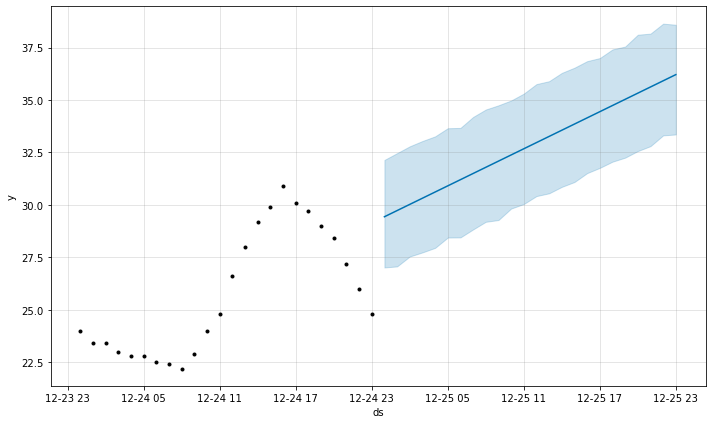

In [0]:
# creating VIZ in order to check temperature evolution
forecast = model1_1d
fig1 = prophet.plot(forecast)

In [0]:
#powerful way to create time series with date_range from pandas
pd.date_range('2007-12-24', '2007-12-25 23:59:00', freq='H')

DatetimeIndex(['2007-12-24 00:00:00', '2007-12-24 01:00:00',
               '2007-12-24 02:00:00', '2007-12-24 03:00:00',
               '2007-12-24 04:00:00', '2007-12-24 05:00:00',
               '2007-12-24 06:00:00', '2007-12-24 07:00:00',
               '2007-12-24 08:00:00', '2007-12-24 09:00:00',
               '2007-12-24 10:00:00', '2007-12-24 11:00:00',
               '2007-12-24 12:00:00', '2007-12-24 13:00:00',
               '2007-12-24 14:00:00', '2007-12-24 15:00:00',
               '2007-12-24 16:00:00', '2007-12-24 17:00:00',
               '2007-12-24 18:00:00', '2007-12-24 19:00:00',
               '2007-12-24 20:00:00', '2007-12-24 21:00:00',
               '2007-12-24 22:00:00', '2007-12-24 23:00:00',
               '2007-12-25 00:00:00', '2007-12-25 01:00:00',
               '2007-12-25 02:00:00', '2007-12-25 03:00:00',
               '2007-12-25 04:00:00', '2007-12-25 05:00:00',
               '2007-12-25 06:00:00', '2007-12-25 07:00:00',
               '2007-12-

# **Model 2: Using 2 days before**

In [0]:
train = tmax[tmax['ds'].isin(pd.date_range('2007-12-23', '2007-12-24 23:59:00', freq='H'))]

In [0]:
def run_prophet(train, test):
  prophet = Prophet()
  prophet.fit(train)

  future = prophet.make_future_dataframe(24,include_history=False,freq='H')
  #fcst = forecast
  fcst = prophet.predict(future)

  return prophet, fcst, mape(test['y'], fcst['yhat'])

In [0]:
model2_2d = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
checkResult(model2_2d[-1],mapeBaseline)

Sorry! Baseline is still better than your model. Try something different. Model: 0.12288413905514504 Baseline: 0.020237714063247793


# **Model 3: Using 7 days before**

In [0]:
train = tmax[tmax['ds'].isin(pd.date_range('2007-12-17', '2007-12-24 23:59:00', freq='H'))]

In [0]:
model3_7d = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [0]:
checkResult(model3_7d[-1],mapeBaseline)

Success! The model got better results than baseline. Model: 0.01722318891162739 Baseline: 0.020237714063247793


# **Model 4: Using 1 month before**

In [0]:
train = tmax[tmax['ds'].isin(pd.date_range('2007-11-24', '2007-12-24 23:59:00', freq='H'))]

In [0]:
model4_1m = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
checkResult(model4_1m[-1],mapeBaseline)

Sorry! Baseline is still better than your model. Try something different. Model: 0.031495246180189736 Baseline: 0.020237714063247793


# **Model 5: Using 2 years before**

In [0]:
train = tmax[tmax['ds'].isin(pd.date_range('2006-01-01', '2007-12-24 23:59:00', freq='H'))]

In [0]:
model5_2y = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
checkResult(model5_2y[-1],mapeBaseline)

Sorry! Baseline is still better than your model. Try something different. Model: 0.05478009574622145 Baseline: 0.020237714063247793


# **Winner Model = Model 3 (7 days before)**

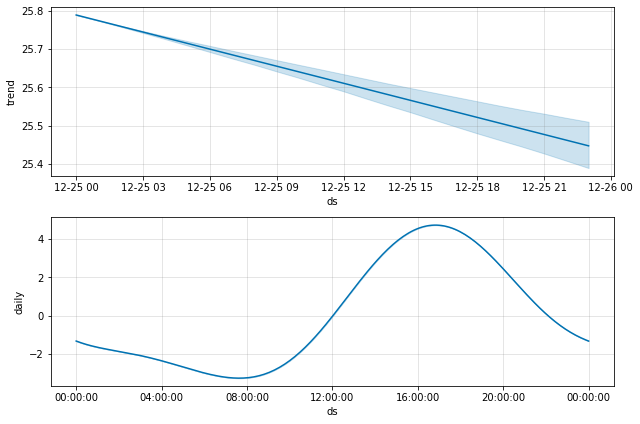

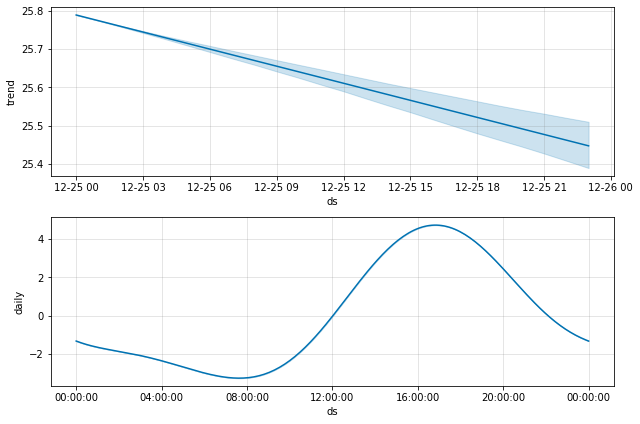

In [0]:
model3_7d[0].plot_components(model3_7d[1])

# **Forecasting with Model 3 - Forecasting temperature based on the last 7 days**

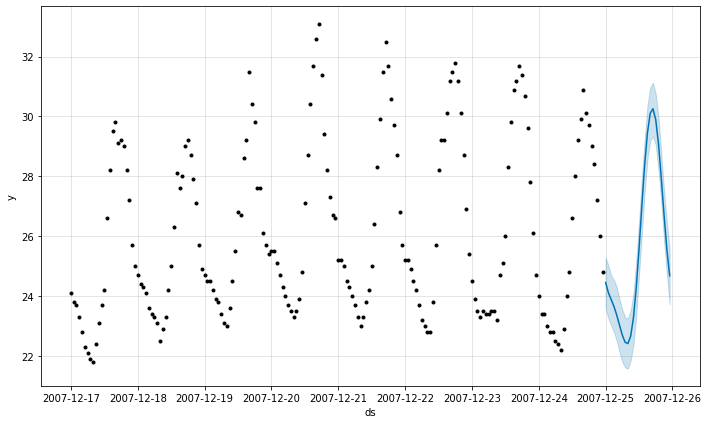

In [0]:
fig_forecast_model3_7d = model3_7d[0].plot(model3_7d[1])


# **Model validation - Cross Validation**

In [0]:
train = tmax[tmax['ds'].isin(pd.date_range('2006-01-01', '2007-12-24 23:59:00', freq='H'))]

In [0]:
prophet_2006, fcst, erro = run_prophet(train, test)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
#using dignostics from prophet in order to validate the model
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_2006, initial='28 days', period='7 days', horizon = '7 days')
df_cv.head()

INFO:fbprophet:Making 56 forecasts with cutoffs between 2006-11-27 23:00:00 and 2007-12-17 23:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2006-11-28 00:00:00,25.075320,22.903354,27.643381,24.9,2006-11-27 23:00:00
1,2006-11-28 01:00:00,25.135387,22.694994,27.541320,25.1,2006-11-27 23:00:00
2,2006-11-28 02:00:00,25.128817,22.814904,27.533009,25.0,2006-11-27 23:00:00
3,2006-11-28 03:00:00,24.970175,22.590029,27.367723,24.8,2006-11-27 23:00:00
4,2006-11-28 04:00:00,24.719633,22.246902,27.170166,24.7,2006-11-27 23:00:00


In [0]:
#using metrics from prophet to check the errors
from fbprophet.diagnostics import performance_metrics

In [0]:
#below the table describe the error for each hour 
#coverage = % how many times the real point was between the range forecasted
performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,coverage
0,0 days 17:00:00,10.321216,3.212665,1.698400,0.937082
1,0 days 18:00:00,9.705660,3.115391,1.702881,0.932827
2,0 days 19:00:00,9.415409,3.068454,1.717143,0.928343
3,0 days 20:00:00,9.512310,3.084203,1.748366,0.923480
4,0 days 21:00:00,9.054013,3.008989,1.751567,0.920289
...,...,...,...,...,...
147,6 days 20:00:00,17.590737,4.194131,2.328714,0.884726
148,6 days 21:00:00,18.029142,4.246074,2.378945,0.875152
149,6 days 22:00:00,18.330143,4.281372,2.413484,0.868769
150,6 days 23:00:00,18.506207,4.301884,2.429655,0.866641


As show aboveve, coverage column, the range predicted is 86% right

In [0]:
#removing zeros from dataset
df_cv_nonzero = df_cv[df_cv['y'] != 0]
perf = performance_metrics(df_cv_nonzero)
perf.sort_values("horizon")

,horizon,mse,rmse,mae,mape,coverage
0,0 days 17:00:00,3.289793,1.813779,1.371108,0.058148,0.954001
1,0 days 18:00:00,3.603652,1.898329,1.417328,0.059163,0.947656
2,0 days 19:00:00,3.937075,1.984206,1.462058,0.060154,0.941400
3,0 days 20:00:00,4.190491,2.047069,1.500646,0.060962,0.936058
4,0 days 21:00:00,4.405904,2.099025,1.537916,0.061829,0.930952
...,...,...,...,...,...,...
147,6 days 20:00:00,6.284189,2.506828,1.897775,0.075522,0.902570
148,6 days 21:00:00,6.561069,2.561458,1.944532,0.076565,0.892934
149,6 days 22:00:00,6.746123,2.597330,1.977235,0.077288,0.886510
150,6 days 23:00:00,6.842117,2.615744,1.991855,0.077492,0.884368


In [0]:
from fbprophet.plot import plot_cross_validation_metric

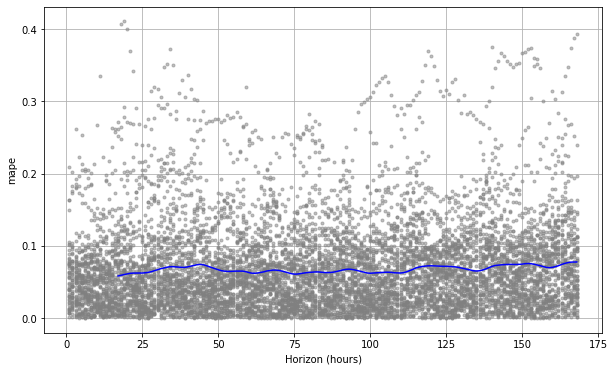

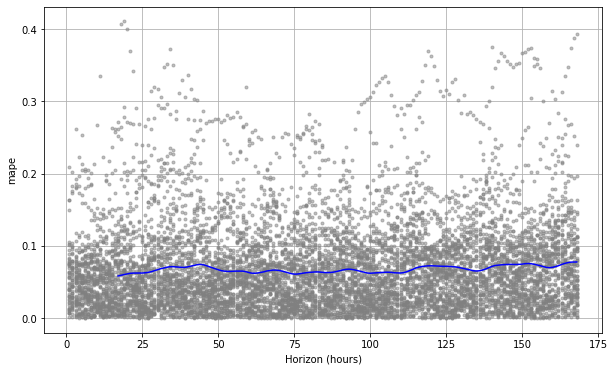

In [0]:
#the blue line is the error 
plot_cross_validation_metric(df_cv_nonzero, 'mape')